In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [4]:
iris = load_iris()

In [5]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['Target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
Setosa = df.iloc[:50]
Versicolor = df.iloc[50:100]
Virginica = df.iloc[100:]

In [11]:
Setosa.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [12]:
Versicolor.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1


In [13]:
Virginica.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2


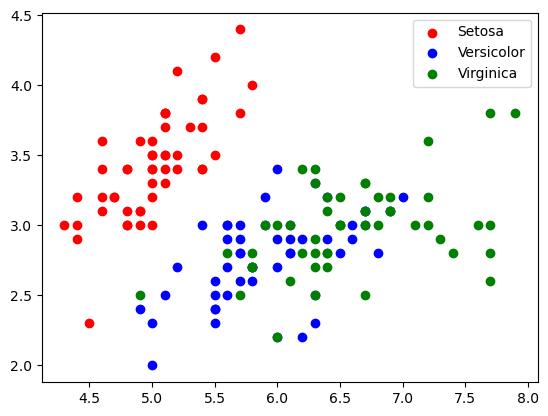

In [23]:
plt.scatter(Setosa['sepal length (cm)'],Setosa['sepal width (cm)'],c='r')
plt.scatter(Versicolor['sepal length (cm)'],Versicolor['sepal width (cm)'],c='b')
plt.scatter(Virginica['sepal length (cm)'],Virginica['sepal width (cm)'],c='g')
plt.legend(['Setosa','Versicolor','Virginica'])
plt.show()

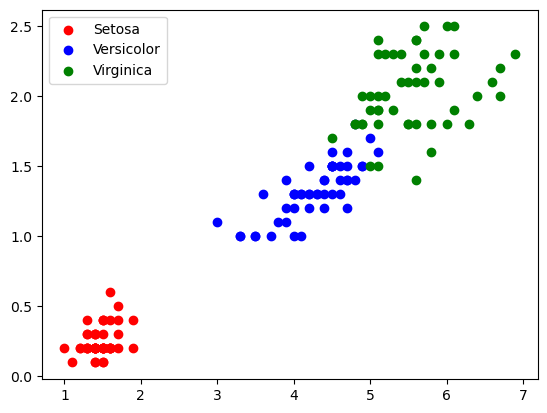

In [24]:
plt.scatter(Setosa['petal length (cm)'],Setosa['petal width (cm)'],c='r')
plt.scatter(Versicolor['petal length (cm)'],Versicolor['petal width (cm)'],c='b')
plt.scatter(Virginica['petal length (cm)'],Virginica['petal width (cm)'],c='g')
plt.legend(['Setosa','Versicolor','Virginica'])
plt.show()

In [25]:
x = iris.data
y = iris.target

In [26]:
estimator = LogisticRegression()

In [27]:
k = 5

In [32]:
scores = cross_val_score(estimator, x, y, cv=k)
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [35]:
for i,score in enumerate(scores):
    print(f'For {i+1} Fold score is {score:.2f}')

For 1 Fold score is 0.97
For 2 Fold score is 1.00
For 3 Fold score is 0.93
For 4 Fold score is 0.97
For 5 Fold score is 1.00


In [38]:
mean_scores = np.mean(scores)
print(f'Mean of scores is {mean_scores:.2f}')

Mean of scores is 0.97


In [39]:
from sklearn.metrics import roc_auc_score, roc_curve

In [40]:
x = x[:100]
y = y[:100]

In [47]:
estimator.fit(x,y)

LogisticRegression()

In [70]:
y_pred_prob = estimator.predict_proba(x)
new_y_pred = y_pred_prob[:,1]
new_y_pred

array([0.01605074, 0.0229682 , 0.01405358, 0.02314939, 0.01405596,
       0.03042824, 0.01553393, 0.02107619, 0.0202351 , 0.02397472,
       0.01918502, 0.02423242, 0.02002241, 0.00813502, 0.00881237,
       0.0141393 , 0.01231092, 0.0176435 , 0.03439281, 0.01694274,
       0.03914824, 0.02035431, 0.00472526, 0.04958648, 0.04729123,
       0.03751878, 0.03183012, 0.02102213, 0.01832334, 0.02770151,
       0.0315708 , 0.03018681, 0.01119149, 0.01020569, 0.02633276,
       0.01274908, 0.01520928, 0.01223889, 0.01475308, 0.02200417,
       0.01346011, 0.03148375, 0.01233584, 0.03512024, 0.04559906,
       0.02416915, 0.01933695, 0.01689146, 0.01837369, 0.0183706 ,
       0.99687687, 0.99415384, 0.99829142, 0.98536126, 0.99690165,
       0.993295  , 0.99616333, 0.87542224, 0.99606795, 0.97287563,
       0.9436567 , 0.98792858, 0.98567779, 0.99646519, 0.94190334,
       0.99351548, 0.99307184, 0.98056037, 0.99741387, 0.97463431,
       0.99726032, 0.98236491, 0.9987081 , 0.996088  , 0.99145

In [71]:
fpr, tpr, th = roc_curve(y,new_y_pred)
fpr
tpr

array([0.  , 0.02, 1.  , 1.  ])

In [72]:
auc = roc_auc_score(y,new_y_pred)
auc

1.0

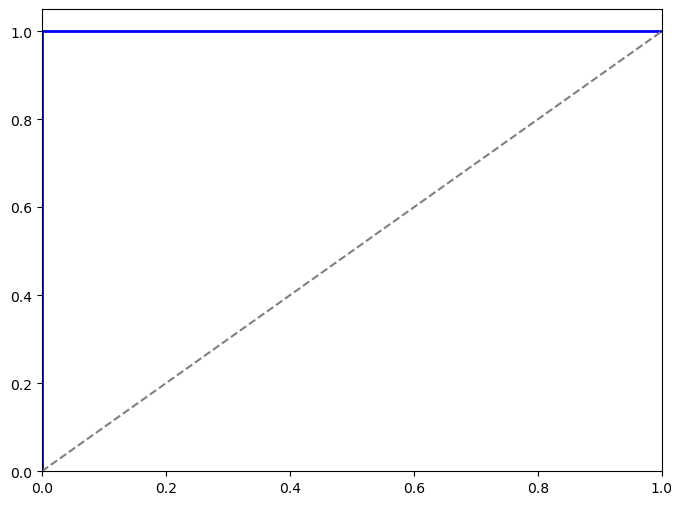

In [73]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,c='b',lw=2)
plt.plot([0,1],[0,1],c='gray',linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.show()